In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
sns.set
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
raw_data = pd.read_csv('/Users/aryamonani/Desktop/Udemy data sci course/The Data Science Course 2018 - All Resources/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S35_L226/1.04. Real-life example.csv')

In [3]:
raw_data.describe(include='all') #missing values are present

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

In [4]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
data_no_mv = raw_data.dropna(axis=0,inplace=False) #dropping missing values is feasible as the number of missing
                                                   #values is less than 5% of the entire dataset count

In [6]:
data_no_mv.describe(include='all') #count is standardised

Brand          Price   Body      Mileage      EngineV  \
count         4025    4025.000000   4025  4025.000000  4025.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1534          NaN          NaN   
mean           NaN   19552.308065    NaN   163.572174     2.764586   
std            NaN   25815.734988    NaN   103.394703     4.935941   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    90.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21900.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4025         4025  4025.000000     4025  
unique           4            2          NaN      306  
top         Diesel          yes          NaN  E-Class  
freq          1861         3654          NaN      188  
mean           NaN          NaN  2006.379627      NaN  
std            NaN          NaN     6.695595      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2007.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

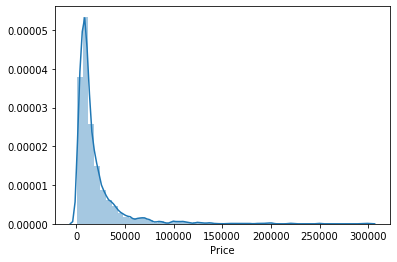

In [7]:
sns.distplot(data_no_mv['Price']) #outliers are present

In [8]:
log_price = np.log(data_no_mv['Price'])

In [9]:
data_no_mv['log_price'] = log_price

/Users/aryamonani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
data_no_mv.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4025    4025.000000   4025  4025.000000  4025.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1534          NaN          NaN   
mean           NaN   19552.308065    NaN   163.572174     2.764586   
std            NaN   25815.734988    NaN   103.394703     4.935941   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    90.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21900.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model    log_price  
count         4025         4025  4025.000000     4025  4025.000000  
unique           4            2          NaN      306          NaN  
top         Diesel          yes          NaN  E-Class          NaN  
freq          1861         3654          NaN      188          NaN  
mean           NaN          NaN  2006.379627      NaN     9.409665  
std            NaN          NaN     6.695595      NaN     0.933136  
min            NaN          NaN  1969.000000      NaN     6.396930  
25%            NaN          NaN  2003.000000      NaN     8.853523  
50%            NaN          NaN  2007.000000      NaN     9.350102  
75%            NaN          NaN  2012.000000      NaN     9.994242  
max            NaN          NaN  2016.000000      NaN    12.611538

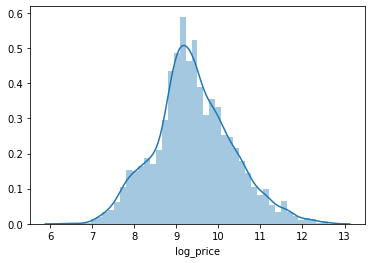

In [11]:
sns.distplot(data_no_mv['log_price'])

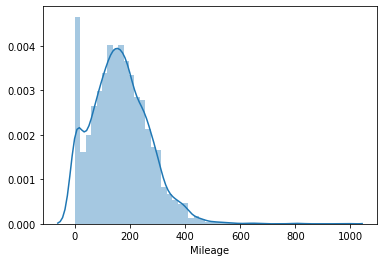

In [12]:
sns.distplot(data_no_mv['Mileage'])

In [13]:
X = data_no_mv

In [14]:
X.describe()

Price      Mileage      EngineV         Year    log_price
count    4025.000000  4025.000000  4025.000000  4025.000000  4025.000000
mean    19552.308065   163.572174     2.764586  2006.379627     9.409665
std     25815.734988   103.394703     4.935941     6.695595     0.933136
min       600.000000     0.000000     0.600000  1969.000000     6.396930
25%      6999.000000    90.000000     1.800000  2003.000000     8.853523
50%     11500.000000   158.000000     2.200000  2007.000000     9.350102
75%     21900.000000   230.000000     3.000000  2012.000000     9.994242
max    300000.000000   980.000000    99.990000  2016.000000    12.611538

In [15]:
X.drop(['Price'],axis=1, inplace=True)

/Users/aryamonani/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
X.describe()

Mileage      EngineV         Year    log_price
count  4025.000000  4025.000000  4025.000000  4025.000000
mean    163.572174     2.764586  2006.379627     9.409665
std     103.394703     4.935941     6.695595     0.933136
min       0.000000     0.600000  1969.000000     6.396930
25%      90.000000     1.800000  2003.000000     8.853523
50%     158.000000     2.200000  2007.000000     9.350102
75%     230.000000     3.000000  2012.000000     9.994242
max     980.000000    99.990000  2016.000000    12.611538

In [17]:
X.describe()

Mileage      EngineV         Year    log_price
count  4025.000000  4025.000000  4025.000000  4025.000000
mean    163.572174     2.764586  2006.379627     9.409665
std     103.394703     4.935941     6.695595     0.933136
min       0.000000     0.600000  1969.000000     6.396930
25%      90.000000     1.800000  2003.000000     8.853523
50%     158.000000     2.200000  2007.000000     9.350102
75%     230.000000     3.000000  2012.000000     9.994242
max     980.000000    99.990000  2016.000000    12.611538

In [18]:
X

Brand       Body  Mileage  EngineV Engine Type Registration  \
0               BMW      sedan      277     2.00      Petrol          yes   
1     Mercedes-Benz        van      427     2.90      Diesel          yes   
2     Mercedes-Benz      sedan      358     5.00         Gas          yes   
3              Audi  crossover      240     4.20      Petrol          yes   
4            Toyota  crossover      120     2.00      Petrol          yes   
5     Mercedes-Benz  crossover        0     5.50      Petrol          yes   
6               BMW      sedan      438     2.00         Gas          yes   
7              Audi      vagon      200     2.70      Diesel          yes   
8           Renault      vagon      193     1.50      Diesel          yes   
9        Volkswagen      other      212     1.80         Gas           no   
10          Renault      vagon      177     1.50      Diesel          yes   
11          Renault      sedan      260     1.79      Petrol          yes   
12             Audi      vagon      165     2.70         Gas          yes   
13       Volkswagen      sedan      100     1.80      Petrol          yes   
14           Toyota  crossover      250     4.70         Gas          yes   
15          Renault      hatch       84     1.50      Diesel          yes   
16              BMW      other      203     2.00      Petrol           no   
18           Toyota  crossover       21     2.00      Petrol          yes   
19             Audi      vagon      250     2.50      Diesel           no   
20           Toyota      other        0     2.40      Diesel          yes   
21       Volkswagen      hatch      132     1.40      Diesel          yes   
22             Audi      sedan      225     2.40         Gas          yes   
23       Mitsubishi  crossover      130     2.40         Gas          yes   
24             Audi      sedan      163     4.20      Diesel          yes   
25       Volkswagen  crossover      151     3.00      Diesel          yes   
26             Audi      sedan      330     2.40      Petrol          yes   
27    Mercedes-Benz      other      171     2.20       Other           no   
28       Mitsubishi      hatch       65     1.30      Petrol          yes   
30             Audi      sedan        1     2.30         Gas          yes   
31              BMW      other       72     3.00      Petrol          yes   
32       Mitsubishi  crossover       87     3.80         Gas          yes   
33              BMW  crossover      160     4.80         Gas          yes   
34       Volkswagen        van      160     1.90      Diesel          yes   
35           Toyota      sedan      147     2.40         Gas          yes   
36              BMW      sedan      300     2.80      Petrol          yes   
37              BMW  crossover        1     2.50      Diesel          yes   
38             Audi      other       14     1.80      Petrol          yes   
40    Mercedes-Benz        van      230     2.15      Diesel          yes   
41    Mercedes-Benz  crossover       86     5.50      Petrol          yes   
42              BMW      sedan      326     2.80      Petrol          yes   
43    Mercedes-Benz        van       30     2.20      Diesel          yes   
44           Toyota      sedan      181     2.40      Petrol          yes   
45              BMW  crossover       80     3.00      Petrol          yes   
46       Mitsubishi      sedan      220     2.40      Petrol          yes   
47              BMW      sedan      231     2.50      Petrol          yes   
48    Mercedes-Benz      sedan      134     5.00      Petrol          yes   
49              BMW      sedan      335     2.80      Petrol          yes   
51          Renault        van       66     1.50      Diesel          yes   
52    Mercedes-Benz  crossover      172     3.50       Other          yes   
53    Mercedes-Benz      sedan      317     5.00      Petrol          yes   
54    Mercedes-Benz        van      266     2.20      Diesel          yes   
57       V

In [19]:
r = X['Mileage'].quantile(0.99)
X = X[X['Mileage']<r]

In [20]:
X.describe()

Mileage      EngineV         Year    log_price
count  3984.000000  3984.000000  3984.000000  3984.000000
mean    159.892570     2.768489  2006.479669     9.417916
std      96.633975     4.960538     6.616733     0.931141
min       0.000000     0.600000  1969.000000     6.396930
25%      90.000000     1.800000  2003.000000     8.853665
50%     157.000000     2.200000  2008.000000     9.350102
75%     227.000000     3.000000  2012.000000     9.997080
max     433.000000    99.990000  2016.000000    12.611538

In [21]:
X

Brand       Body  Mileage  EngineV Engine Type Registration  \
0               BMW      sedan      277     2.00      Petrol          yes   
1     Mercedes-Benz        van      427     2.90      Diesel          yes   
2     Mercedes-Benz      sedan      358     5.00         Gas          yes   
3              Audi  crossover      240     4.20      Petrol          yes   
4            Toyota  crossover      120     2.00      Petrol          yes   
5     Mercedes-Benz  crossover        0     5.50      Petrol          yes   
7              Audi      vagon      200     2.70      Diesel          yes   
8           Renault      vagon      193     1.50      Diesel          yes   
9        Volkswagen      other      212     1.80         Gas           no   
10          Renault      vagon      177     1.50      Diesel          yes   
11          Renault      sedan      260     1.79      Petrol          yes   
12             Audi      vagon      165     2.70         Gas          yes   
13       Volkswagen      sedan      100     1.80      Petrol          yes   
14           Toyota  crossover      250     4.70         Gas          yes   
15          Renault      hatch       84     1.50      Diesel          yes   
16              BMW      other      203     2.00      Petrol           no   
18           Toyota  crossover       21     2.00      Petrol          yes   
19             Audi      vagon      250     2.50      Diesel           no   
20           Toyota      other        0     2.40      Diesel          yes   
21       Volkswagen      hatch      132     1.40      Diesel          yes   
22             Audi      sedan      225     2.40         Gas          yes   
23       Mitsubishi  crossover      130     2.40         Gas          yes   
24             Audi      sedan      163     4.20      Diesel          yes   
25       Volkswagen  crossover      151     3.00      Diesel          yes   
26             Audi      sedan      330     2.40      Petrol          yes   
27    Mercedes-Benz      other      171     2.20       Other           no   
28       Mitsubishi      hatch       65     1.30      Petrol          yes   
30             Audi      sedan        1     2.30         Gas          yes   
31              BMW      other       72     3.00      Petrol          yes   
32       Mitsubishi  crossover       87     3.80         Gas          yes   
33              BMW  crossover      160     4.80         Gas          yes   
34       Volkswagen        van      160     1.90      Diesel          yes   
35           Toyota      sedan      147     2.40         Gas          yes   
36              BMW      sedan      300     2.80      Petrol          yes   
37              BMW  crossover        1     2.50      Diesel          yes   
38             Audi      other       14     1.80      Petrol          yes   
40    Mercedes-Benz        van      230     2.15      Diesel          yes   
41    Mercedes-Benz  crossover       86     5.50      Petrol          yes   
42              BMW      sedan      326     2.80      Petrol          yes   
43    Mercedes-Benz        van       30     2.20      Diesel          yes   
44           Toyota      sedan      181     2.40      Petrol          yes   
45              BMW  crossover       80     3.00      Petrol          yes   
46       Mitsubishi      sedan      220     2.40      Petrol          yes   
47              BMW      sedan      231     2.50      Petrol          yes   
48    Mercedes-Benz      sedan      134     5.00      Petrol          yes   
49              BMW      sedan      335     2.80      Petrol          yes   
51          Renault        van       66     1.50      Diesel          yes   
52    Mercedes-Benz  crossover      172     3.50       Other          yes   
53    Mercedes-Benz      sedan      317     5.00      Petrol          yes   
54    Mercedes-Benz        van      266     2.20      Diesel          yes   
57       Volkswagen      vagon      265     2.00      Diesel           no   
58        

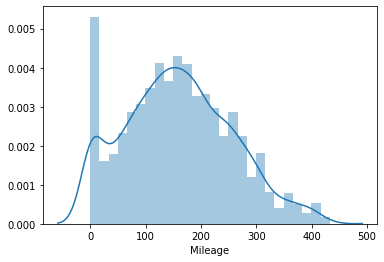

In [22]:
sns.distplot(X['Mileage'])

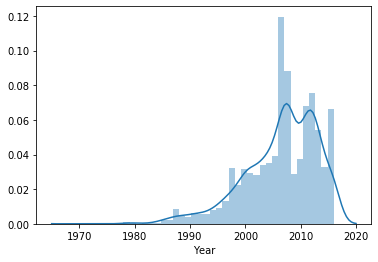

In [23]:
sns.distplot(X['Year'])

In [24]:
t = X['Year'].quantile(0.01)

In [25]:
X = X[X['Year']>t]

In [26]:
X.describe()

Mileage      EngineV         Year    log_price
count  3930.000000  3930.000000  3930.000000  3930.000000
mean    159.148092     2.779786  2006.779644     9.440245
std      96.205589     4.993272     6.131360     0.914704
min       0.000000     0.600000  1988.000000     6.684612
25%      90.000000     1.800000  2003.000000     8.881836
50%     156.000000     2.200000  2008.000000     9.371609
75%     225.000000     3.000000  2012.000000     9.998798
max     433.000000    99.990000  2016.000000    12.611538

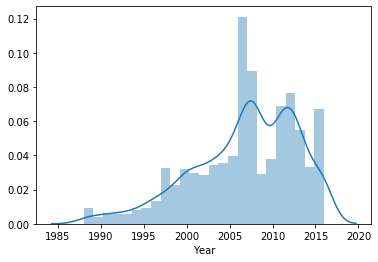

In [27]:
sns.distplot(X['Year'])

In [28]:
X = X[X['EngineV']<6.5]
X_test_full = X.copy()
X.describe(include='all')

Brand   Body      Mileage      EngineV Engine Type Registration  \
count         3907   3907  3907.000000  3907.000000        3907         3907   
unique           7      6          NaN          NaN           4            2   
top     Volkswagen  sedan          NaN          NaN      Diesel          yes   
freq           848   1472          NaN          NaN        1815         3545   
mean           NaN    NaN   158.929358     2.474771         NaN          NaN   
std            NaN    NaN    96.242696     0.978819         NaN          NaN   
min            NaN    NaN     0.000000     0.600000         NaN          NaN   
25%            NaN    NaN    89.500000     1.800000         NaN          NaN   
50%            NaN    NaN   155.000000     2.200000         NaN          NaN   
75%            NaN    NaN   225.000000     3.000000         NaN          NaN   
max            NaN    NaN   433.000000     6.300000         NaN          NaN   

               Year    Model    log_price  
count   3907.000000     3907  3907.000000  
unique          NaN      295          NaN  
top             NaN  E-Class          NaN  
freq            NaN      181          NaN  
mean    2006.798055      NaN     9.444071  
std        6.127291      NaN     0.914405  
min     1988.000000      NaN     6.684612  
25%     2003.000000      NaN     8.892125  
50%     2008.000000      NaN     9.375855  
75%     2012.000000      NaN     9.998798  
max     2016.000000      NaN    12.611538

In [29]:
y = X.log_price
y_test = X.log_price

In [30]:
X.drop('log_price',axis=1,inplace=True)

In [31]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0) 

In [32]:
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                       X_train_full[cname].dtype=='object']

In [33]:
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64','float64']]

In [34]:
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [35]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [36]:
y.shape

(3907,)

In [37]:
X.shape

(3907, 8)

In [38]:
my_model_1 = XGBRegressor()
my_model_1.fit(X_train,y_train)

/Users/aryamonani/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:11:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [41]:
predictions_1 = my_model_1.predict(X_test)
mae_1 = mean_absolute_error(y_test, predictions_1)
mae_1

0.1740113593554306

In [40]:
my_model_2 = XGBRegressor(n_estimator=10000, learning_rate=0.05)
my_model_2.fit(X_train, y_train)

/Users/aryamonani/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:11:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimator=10000,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [42]:
predictions_2 = my_model_2.predict(X_test)
mae_2 = mean_absolute_error(y_test, predictions_2)
mae_2

0.19877294383257138

In [43]:
my_model_3 = XGBRegressor(n_estimator=100000, learning_rate=0.07)
my_model_3.fit(X_train, y_train)
predictions_3 = my_model_3.predict(X_test)
mae_3 = mean_absolute_error(y_test, predictions_3)
mae_3

/Users/aryamonani/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.1838019606037408

Clearly my_model_1 is the best model with the lowest mean absolute error

In [45]:
predictions_1 = np.exp(predictions_1)

In [46]:
predictions_1

array([ 3844.1829,  6474.4165, 13497.138 , ..., 95089.79  ,  8127.6875,
       17932.016 ], dtype=float32)

In [51]:
y_test = np.exp(y_test)

In [52]:
output = pd.DataFrame({'Target price' : y_test,
                      'Output' : predictions_1})

In [53]:
output

Target price         Output
0          4200.00    3844.182861
1          7900.00    6474.416504
2         13300.00   13497.137695
3         23000.00   24643.804688
4         18300.00   20330.800781
5        199999.00  184310.000000
7         14200.00   13577.037109
8         10799.00    8935.350586
9          1400.00    2201.412842
10        11950.00    8935.350586
11         2500.00    3160.040283
12         9500.00   11005.762695
13        10500.00   10546.243164
14        16000.00   15742.746094
15         8600.00    8688.458008
16         2990.00    3502.572510
18        26500.00   28395.349609
19         3500.00    2487.901367
20        38233.00   34989.453125
21         7500.00    7945.871094
22         6800.00    6390.955566
23        10500.00    9632.493164
24        24900.00   24175.726562
25        20800.00   21728.800781
26         6500.00    6564.806641
27        13566.00   12875.718750
28         8500.00    8975.988281
30         2900.00    3525.017578
31        21500.00   23535.453125
32        17900.00   17809.392578
33        28500.00   27137.984375
34         9800.00   10618.381836
35        14500.00   10705.877930
36         6000.00    5469.252930
37        67500.00   52551.191406
38        33900.00   30698.974609
40         9800.00    8420.950195
41        63000.00   47212.050781
42         7700.00    6443.218262
43         9600.00   13258.416016
44        12800.00   12861.323242
45        41000.00   43212.675781
47         3700.00    3985.099365
48        29500.00   29562.302734
49         6500.00    5469.252930
51         8250.00   10054.086914
52        19500.00   22418.312500
53        13500.00   11741.165039
54         9200.00   12283.788086
57         5000.00    5181.998535
58        23900.00   25362.027344
59        36900.00   35518.804688
60         8900.00    5547.445312
61         7800.00    5109.308105
62       133000.00   97041.031250
63         1650.00    2077.700684
64        50000.00   14996.483398
65         9700.00    9171.722656
66         9999.00   10677.002930
67        69999.00   74830.757812
68         6500.00    6819.915527
69         4300.00    3860.877686
70         3000.00    2717.342529
71         8700.00    6912.669434
72         9000.00    9514.688477
73        20400.00   18204.349609
74         9000.00    8768.444336
75        13400.00   10228.732422
76         3700.00    2985.615479
77         9850.00   15825.642578
78         3700.00    4265.723145
79        15700.00   15083.086914
80        24500.00   19348.457031
81         7500.00    6819.915527
82        11990.00    7985.411621
83        13708.50   15919.660156
84         8200.00    6471.323730
85         6999.00    7050.018066
86         6750.00    5773.934082
87        18500.00   15770.169922
88        14299.00   14242.433594
89        28500.00   21140.687500
90        17000.00   17809.392578
92        25700.00   31086.359375
93         2650.00    2838.128418
94         8500.00    7316.171387
95         4000.00    3532.734375
96        11000.00    8552.923828
97        14500.00   11793.066406
98         4099.00    4005.247070
99        31500.00   31978.648438
100        4500.00    5043.386719
101        6700.00    7491.440918
103       20800.00   19700.966797
104      107999.00  124040.812500
105        3500.00    2889.306885
106       39000.00   34611.410156
107       13500.00   16447.404297
108        6150.00    6819.915527
109       45500.00   42668.238281
110        4900.00    4604.391602
111       47000.00   44058.246094
112       19200.00   13727.728516
114       11100.00   11687.607422
115        8200.00   10083.537109
116       10300.00   10319.511719
117       11990.00    8402.331055
119       46800.00   40055.355469
120        1500.00    1771.533569
121        6350.00    7169.144043
123        8900.00    8569.997070
124       12700.00   17284.335938
125        8000.00    6809.984863
126       29500.00   27997.328125
128        7100.00    6876.197754
129       10850.00   14935.225586
131      195000.00  103664.6

In [56]:
output.to_csv('output.csv')